In [1]:
import pandas as pd 
import numpy as np 
import requests 
import matplotlib.pyplot as plt

%matplotlib inline

tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW'] 

# Get the time series for 5 cryptocurrencies.

In [2]:
def get_data(token):
    exchange = 'coinbase-pro'
    if token == "FLOW":
        exchange = 'kraken'
    res = requests.get(
        f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df



In [3]:
df_list = [get_data(token) for token in tokens]

In [4]:
for i in range(len(tokens)):
    print(tokens[i])
    print(df_list[i].shape)

ETH
(690, 8)
SOL
(690, 8)
AVAX
(690, 8)
USDT
(690, 8)
FLOW
(690, 8)


# Get the total USD volume for each token.

In [5]:
token_2_vol = {'token':[], 'vol': []}
for df in df_list:
    token_2_vol['token'].append(df['token'][0])
    token_2_vol['vol'].append(df['volumeUSD'].sum())
    
token_2_vol

{'token': ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW'],
 'vol': [25529208586.21322,
  8349064540.618189,
  4564094538.6683,
  2305841926.789549,
  97990434.45478767]}

In [6]:
token_2_vol = pd.DataFrame(token_2_vol)
token_2_vol.set_index('token', inplace=True)
token_2_vol.sort_values('vol', ascending=False, inplace=True)
token_2_vol

,vol
token,
ETH,2.552921e+10
SOL,8.349065e+09
AVAX,4.564095e+09
USDT,2.305842e+09
FLOW,9.799043e+07


# Calculate the close price ratio

In [7]:
df = pd.concat(df_list, ignore_index=True)

df.head(10)

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH
5,2021-11-22 05:00:00,4168.35,4186.49,4151.32,4158.06,3897.508536,1.625787e+07,ETH
6,2021-11-22 06:00:00,4157.70,4187.42,4128.04,4187.42,5802.716761,2.415259e+07,ETH
7,2021-11-22 07:00:00,4187.67,4189.52,4163.70,4182.49,3299.589361,1.379359e+07,ETH
8,2021-11-22 08:00:00,4182.54,4220.48,4180.13,4190.73,3316.448902,1.394386e+07,ETH
9,2021-11-22 09:00:00,4191.40,4214.85,4188.64,4200.91,2318.602012,9.739035e+06,ETH


In [8]:
df['close_ETH/SOL'] = np.tile(df[df['token'] == 'ETH']['close'].values / df[df['token'] == 'SOL']['close'].values, 5)

df

,ts,open,high,low,close,volume,volumeUSD,token,close_ETH/SOL
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
3445,2021-12-20 13:00:00,8.151,8.151,8.040,8.050,8386.948252,6.790392e+04,FLOW,22.215527
3446,2021-12-20 14:00:00,8.034,8.102,8.034,8.082,9405.328266,7.597483e+04,FLOW,22.207738
3447,2021-12-20 15:00:00,8.064,8.093,8.011,8.093,28745.660629,2.313734e+05,FLOW,22.170718
3448,2021-12-20 16:00:00,8.094,8.094,8.065,8.065,1810.701306,1.462834e+04,FLOW,22.359920


# Change the name

In [9]:
df.rename(
    columns={
        'volume':'volumeBase',
        'volumeUSD':'volumeTerm'
    },
    inplace=True
)


# Fat table

In [10]:
df_fat = {}
df_fat['ts'] = df[df['token'] == 'ETH']['ts'].values
for token in tokens:
    df_fat[token] = df[df['token'] == token]['close'].values
df_fat = pd.DataFrame(df_fat)

df_fat = df_fat.set_index('ts')

df_fat

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-20 13:00:00,3782.86,170.280,103.42,1.0003,8.050
2021-12-20 14:00:00,3776.87,170.070,103.07,1.0002,8.082
2021-12-20 15:00:00,3840.19,173.210,104.74,1.0002,8.093


# Calculate the hour by hour log return

In [11]:
df_ret = np.log(df_fat / df_fat.shift(periods=1)).dropna()

df_ret

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
2021-11-22 05:00:00,-0.002472,-0.015161,-0.031832,-0.0001,-0.014014
...,...,...,...,...,...
2021-12-20 13:00:00,-0.008314,-0.013243,-0.008569,0.0001,-0.014062
2021-12-20 14:00:00,-0.001585,-0.001234,-0.003390,-0.0001,0.003967
2021-12-20 15:00:00,0.016626,0.018295,0.016073,0.0000,0.001360


# Calculate the correlation of tokens

In [12]:
df_ret_corr = df_ret.corr()

df_ret_corr

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.762313,0.656111,-0.088038,0.579605
SOL,0.762313,1.000000,0.647053,0.104219,0.476223
AVAX,0.656111,0.647053,1.000000,0.014360,0.403521
USDT,-0.088038,0.104219,0.014360,1.000000,-0.175985
FLOW,0.579605,0.476223,0.403521,-0.175985,1.000000


# Visualize the correlation

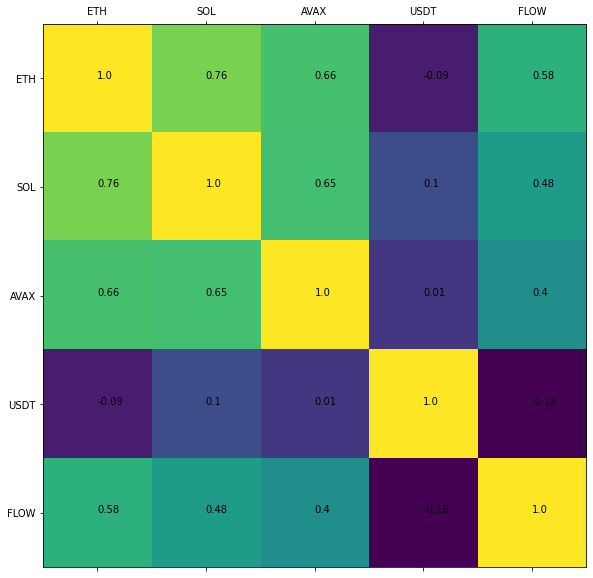

In [14]:
def plot_heatmap(corr, size):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            ax.text(i, j, round(corr.iloc[i, j], 2), )
    plt.show()
    return 

plot_heatmap(df_ret_corr, 10)